In [ ]:
作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数
2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格
3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv(r'D:\user_profile\python\project\3\六普常住人口数.csv',engine='python')
data2 = pd.read_csv(r'D:\user_profile\python\project\3\知乎数据_201701.csv',engine='python')
print(data1.head())
print(data2.head())

     省   地区 结尾        常住人口
0  安徽省  安徽省  省  59500468.0
1  安徽省  安庆市  市   5311379.0
2  安徽省  蚌埠市  市   3164467.0
3  安徽省  亳州市  市   4850657.0
4  安徽省  巢湖市  市   3873102.0
                        _id  关注的收藏夹   关注  关注者  关注的问题  关注的话题  关注的专栏   职业1  \
0  587598f89f11daf90617fb7a      52   17    1     30     58      2  交通仓储   
1  587598f89f11daf90617fb7c      27   73   15     87     26      1  高新科技   
2  587598f89f11daf90617fb7e      72   94    1    112     20      4   NaN   
3  587598f89f11daf90617fb80     174   84    8    895     30      7    金融   
4  587598f89f11daf90617fb82       3  236   64    119     44     17    金融   

    职业2    回答   提问    收藏       个人简介  居住地  所在行业                       教育经历 职业经历  
0    邮政   0.0  0.0   3.0        NaN  NaN    邮政                        NaN  NaN  
1   互联网  56.0  4.0  14.0        NaN   重庆   互联网                     重庆邮电大学  NaN  
2   NaN   1.0  0.0  21.0        NaN  NaN   NaN                        NaN  NaN  
3    财务   0.0  0.0  22.0        NaN  NaN    财务           

In [3]:
'''
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数
'''
def remove_na(df):
    cols = df.columns
    for col in cols:
        if df[col].dtype == 'object':
            df[col].fillna('缺失数据',inplace=True)
        else:
            df[col].fillna(0,inplace=True)
    return(df)

data2_c = remove_na(data2)
print(data2_c.head())

                        _id  关注的收藏夹   关注  关注者  关注的问题  关注的话题  关注的专栏   职业1  \
0  587598f89f11daf90617fb7a      52   17    1     30     58      2  交通仓储   
1  587598f89f11daf90617fb7c      27   73   15     87     26      1  高新科技   
2  587598f89f11daf90617fb7e      72   94    1    112     20      4  缺失数据   
3  587598f89f11daf90617fb80     174   84    8    895     30      7    金融   
4  587598f89f11daf90617fb82       3  236   64    119     44     17    金融   

    职业2    回答   提问    收藏       个人简介   居住地  所在行业                       教育经历  \
0    邮政   0.0  0.0   3.0       缺失数据  缺失数据    邮政                       缺失数据   
1   互联网  56.0  4.0  14.0       缺失数据    重庆   互联网                     重庆邮电大学   
2  缺失数据   1.0  0.0  21.0       缺失数据  缺失数据  缺失数据                       缺失数据   
3    财务   0.0  0.0  22.0       缺失数据  缺失数据    财务                       缺失数据   
4  证券投资   6.0  0.0  12.0  无求 心静 魔不生    上海  证券投资  雪城大学（Syracuse University）   

   职业经历  
0  缺失数据  
1  缺失数据  
2  缺失数据  
3  缺失数据  
4  缺失数据  


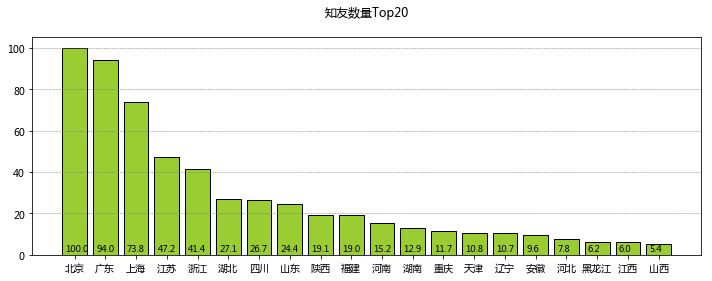

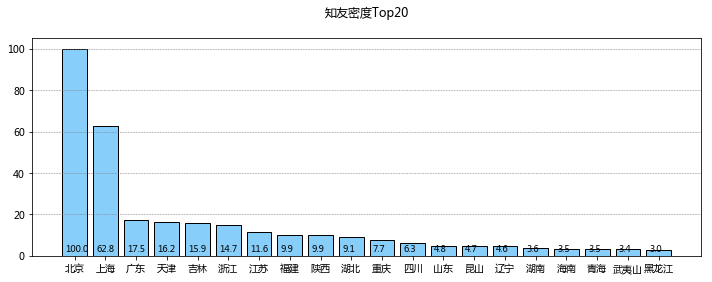

In [17]:
'''
2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格
'''
df_city = data2_c.groupby('居住地').count()             # 按照居住地统计知友数量
#print(df_city.head())
data1['city'] = data1['地区'].str[:-1]                  # 城市信息清洗，去掉城市等级文字
# print(data1['city'].head())
q1data = pd.merge(df_city,data1,left_index=True,right_on='city',how='inner')[['_id','city','常住人口']]
q1data['知友密度'] = q1data['_id']/q1data['常住人口']   # 统计计算知友数量，知友密度

def data_non(df,*cols):                                 # 创建函数，结果返回标准化取值，新列列名
    colnames = []
    for col in cols:
        colname = col+ '_nor'
        df[colname] = (df[col]-df[col].min()) / (df[col].max()-df[col].min())*100
        colnames.append(colname)
    return(df,colnames)

resultdata = data_non(q1data,'_id','知友密度')[0]
resultcolnames = data_non(q1data,'_id','知友密度')[1]
#print(resultdata)
#print(resultcolnames)
# 标准化取值后得到知友数量，知友密度的TOP20数据
q1data_top20_sl = resultdata.sort_values(resultcolnames[0],ascending=False)[['city',resultcolnames[0]]].iloc[:20]
q1data_top20_md = resultdata.sort_values(resultcolnames[1],ascending=False)[['city',resultcolnames[1]]].iloc[:20]

fig1 = plt.figure(num=1,figsize=(12,4))
y1 = q1data_top20_sl[resultcolnames[0]]
plt.bar(range(20),                                      
        y1,
        width=0.8,
        facecolor='yellowgreen',
        edgecolor='k',
        tick_label=q1data_top20_sl['city'])
plt.title('知友数量Top20\n')
plt.grid(True, linestyle = "--",color = "gray",axis='y',linewidth=0.5)
for i,j in zip(range(20),y1):
    plt.text(i-0.3,2,'%.1f'%j,color='k',fontsize=9)

fig1 = plt.figure(num=2,figsize=(12,4))
y2 = q1data_top20_md[resultcolnames[1]]
plt.bar(range(20),
        y2,
        width=0.8,
        facecolor='lightskyblue',
        edgecolor='k',
        tick_label=q1data_top20_md['city'],
        )
plt.title('知友密度Top20\n')
plt.grid(True, linestyle = "--",color = "gray",axis='y',linewidth=0.5)
for i,j in zip(range(20),y2):
    plt.text(i-0.3,2,'%.1f'%j,color='k',fontsize=9)

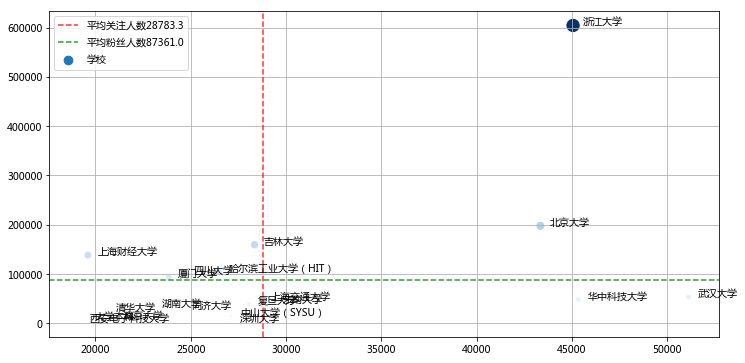

In [24]:
'''
3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格
'''

q2data = data2_c.groupby('教育经历').sum()[['关注','关注者']].drop(['缺失数据','大学','本科'])

q2data_c = q2data.sort_values('关注',ascending=False)[:20]        # 统计计算学校的粉丝数、被关注量
#print(q2data_c)
plt.figure(figsize=(12,6))
x = q2data_c['关注']
y = q2data_c['关注者']
follow_mean = q2data_c['关注'].mean()
fans_mean = q2data_c['关注者'].mean()
plt.scatter(x,y,                                                   # 创建散点图
            marker='.',
            s=y/1000,
            cmap='Blues',
            c = y,
            alpha=1,
            label='学校')
plt.axvline(follow_mean,hold=None,label=f'平均关注人数{follow_mean}',color='r',linestyle='--',alpha=0.8)    # 添加x轴参考线
plt.axhline(fans_mean,hold=None,label=f'平均粉丝人数{fans_mean}',color='g',linestyle='--',alpha=0.8)        # 添加y轴参考线
plt.legend(loc='upper left')
plt.grid()
for i,j,k in zip(x,y,q2data_c.index):                # 添加注释
    plt.text(i+500,j,k,color='k')